### Methylation Viusal and Statistical Analysis

This code analyzes a multi-tissue DNA methylation dataset from mice, sourced from ['Multi-tissue DNA methylation age predictor in mouse'](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1203-5). It calculates average methylation rate, depth, and identifies tissue-specific and age-related differentiations in the samples. By employing  statistical techniques, this code will provide valuable insights into DNA methylation patterns and their association with aging processes. 

In [1]:
import gzip
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from typing import Tuple, List
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from cov_read_module import Cov_Read

In [2]:
pd.set_option('display.max_rows', None)

### Import Cov_read & Build Dataframe

**Cov_read** is a custom python library that is capable of reading bismarck coverage methylation files into python via pandas and building "result dataframes" which will be used for further data processing. ``.build_df(file_path, print_path)`` is a member function of **Cov_Read** that will read an individual coverage file and return a pandas representation of the data. `.build_result(file_path, print_path)` will build a summary dataframe with the mean of a sample's methylation rate.

In [5]:
reader = Cov_Read()
df = reader.build_df("data/GSE93957_RAW/GSM2465615_M00018359_41wk_Cortex.cov.txt.gz", print_path=True)

data/GSE93957_RAW/GSM2465615_M00018359_41wk_Cortex.cov.txt.gz


Representation of Dataframe:

In [6]:
df.head(10)

,chromosome,s_loc,e_loc,methyl rate,methylated reads,unmethylated reads,CG site
0,18,3002270,3002270,0.0,0,1,False
1,18,3002312,3002312,100.0,1,0,False
2,18,3003034,3003034,0.0,0,1,True
3,18,3003035,3003035,0.0,0,2,True
4,18,3005504,3005504,100.0,1,0,True
5,18,3005505,3005505,100.0,1,0,True
6,18,3005549,3005549,0.0,0,1,True
7,18,3005550,3005550,100.0,1,0,True
8,18,3005841,3005841,0.0,0,1,False
9,18,3006141,3006141,50.0,1,1,False


### Load the data and parse the results

Parsing through all the data takes about two minutes.

In [7]:
# Perform statistical analysis and build a 'result DataFrame' that will be saved
df = reader.build_result("data/GSE93957_RAW", test=False)

Processing GSM2465633_M00018724_27wk_Liver.cov.txt.gz
Processing GSM2465619_M00018362_41wk_Cortex.cov.txt.gz
Processing GSM2465667_M04NB_1wk_Liver.cov.txt.gz
Processing GSM2465627_M00018381_41wk_Cortex.cov.txt.gz
Processing GSM2465631_M00018724_27wk_Cortex.cov.txt.gz
Processing GSM2465653_M02NB_1wk_Lung.cov.txt.gz
Processing GSM2465636_M00018752_27wk_Heart.cov.txt.gz
Processing GSM2465632_M00018724_27wk_Heart.cov.txt.gz
Processing GSM2465637_M00018752_27wk_Liver.cov.txt.gz
Processing GSM2465625_M00018363_41wk_Liver.cov.txt.gz
Processing GSM2465668_M04NB_1wk_Lung.cov.txt.gz
Processing GSM2465662_M0420527_14wk_Heart.cov.txt.gz
Processing GSM2465665_M04NB_1wk_Cortex.cov.txt.gz
Processing GSM2465642_M00018754_27wk_Lung.cov.txt.gz
Processing GSM2465676_M0520522_14wk_Lung.cov.txt.gz
Processing GSM2465621_M00018362_41wk_Liver.cov.txt.gz
Processing GSM2465675_M0520522_14wk_Liver.cov.txt.gz
Processing GSM2465648_M01NB_1wk_Heart.cov.txt.gz
Processing GSM2465640_M00018754_27wk_Heart.cov.txt.gz
Pr

In [22]:
df.sort_values("age", ignore_index=True, inplace=True)
df.head(10)

,id,age,tissue,num_sites,ave depth,ave methylation,ave methylation > 2 depth,ave methylation > 5 depth
0,GSM2465674_M0520522,14wk,Heart,4719569,26.478823,34.068898,33.398083,34.538635
1,GSM2465662_M0420527,14wk,Heart,4012254,11.203590,33.750859,34.087787,35.369721
2,GSM2465659_M0420525,14wk,Liver,4251425,13.185862,34.978373,35.126138,36.693240
3,GSM2465675_M0520522,14wk,Liver,3984791,9.920883,34.910159,35.260631,36.783023
4,GSM2465661_M0420527,14wk,Cortex,4353542,19.095015,35.497980,35.728867,37.005476
5,GSM2465660_M0420525,14wk,Lung,4143370,14.824189,34.019018,34.253134,35.615555
6,GSM2465664_M0420527,14wk,Lung,4017025,14.191690,34.352192,34.860959,36.634177
7,GSM2465657_M0420525,14wk,Cortex,4205076,14.687372,35.974207,36.301597,37.987918
8,GSM2465676_M0520522,14wk,Lung,3833871,12.380396,34.678738,35.391674,37.767141
9,GSM2465673_M0520522,14wk,Cortex,3993331,12.758077,35.864310,36.232565,37.470658


In [9]:
df[(df['age']=='27wk') & (df['tissue']=='Cortex')]

,id,age,tissue,num_sites,ave depth,ave methylation,ave methylation > 2 depth,ave methylation > 5 depth
26,GSM2465635_M00018752,27wk,Cortex,4189271,17.318348,35.768538,36.043794,37.530824
27,GSM2465639_M00018754,27wk,Cortex,4182114,15.634243,36.432456,36.907237,38.767288
29,GSM2465643_M0112371,27wk,Cortex,3980861,13.733747,35.791901,36.013443,36.952836
34,GSM2465669_M0512375,27wk,Cortex,4136638,15.853547,35.217983,35.212114,35.383589
38,GSM2465631_M00018724,27wk,Cortex,4086565,15.372909,36.412410,36.922754,38.977554


In [10]:
# Save results
df.to_csv('result.csv', index=False)

## Methylation rates by age
Lets calculate the average methylation rate for each age group

In [11]:
column_names = ['age', 'num_sites', 'ave depth', 'ave methylation', 'ave methylation > 2 depth', 'ave methylation > 5 depth']
age_df = pd.DataFrame(columns=column_names)

age_list = df['age'].unique()
for age in age_list:
    num_sites = df[df['age'] == age]['num_sites'].sum()
    ave_depth = df[df['age'] == age]['ave depth'].mean()
    ave_meth = df[df['age'] == age]['ave methylation'].mean()
    ave_meth_2 = df[df['age'] == age]['ave methylation > 2 depth'].mean()
    ave_meth_5 = df[df['age'] == age]['ave methylation > 5 depth'].mean()
    age_df.loc[len(age_df.index)] = [age, num_sites, ave_depth, ave_meth, ave_meth_2, ave_meth_5]

age_df


,age,num_sites,ave depth,ave methylation,ave methylation > 2 depth,ave methylation > 5 depth
0,14wk,50404726,14.369817,34.766618,35.002258,36.531422
1,1wk,57377240,14.816588,33.302520,33.603920,34.978661
2,27wk,80234281,12.114445,35.073280,35.537200,37.495350
3,41wk,66345571,13.723043,34.848199,35.194057,36.797020


In [12]:
print(age_df['ave methylation'].mean())
print(age_df['ave methylation > 2 depth'].mean())
print(age_df['ave methylation > 5 depth'].mean())

34.49765411514188
34.83435894494286
36.45061328118506


grouped_data = df.groupby('tissue')['ave'].apply(list)

## Graphing & Data Visualization

Lets visualize the trends and range of values provided by the methylation data

In [13]:
# First we need to group by 'age' and 'tissue' and calculate the average 'ave_methylation'
grouped_df = df.groupby(['age', 'tissue']).agg({'ave methylation': 'mean'}).reset_index()


# let's convert the 'age' column to a sortable integer column.
grouped_df['age_int'] = grouped_df['age'].str.replace('wk', '').astype(int)

# Now let's sort the DataFrame by this new 'age_int' column.
grouped_df = grouped_df.sort_values(by='age_int').reset_index(drop=True)

# If you want to drop the 'age_int' column after sorting, you can do so.
grouped_df.drop('age_int', axis=1, inplace=True)

grouped_df


,age,tissue,ave methylation
0,1wk,Cortex,34.139432
1,1wk,Heart,32.786160
2,1wk,Liver,33.375350
3,1wk,Lung,32.798255
4,14wk,Cortex,35.778832
5,14wk,Heart,33.998047
6,14wk,Liver,34.939611
7,14wk,Lung,34.349983
8,27wk,Cortex,35.924657
9,27wk,Heart,33.884066


In [14]:
# initialize iterable list for graphs
age_list = grouped_df['age'].unique()
unique_tissues = grouped_df['tissue'].unique()  
color_map = {tissue: f'C{i}' for i, tissue in enumerate(unique_tissues)}

##### **Box-and-whisker Plot**:

In [15]:
age_list

array(['1wk', '14wk', '27wk', '41wk'], dtype=object)

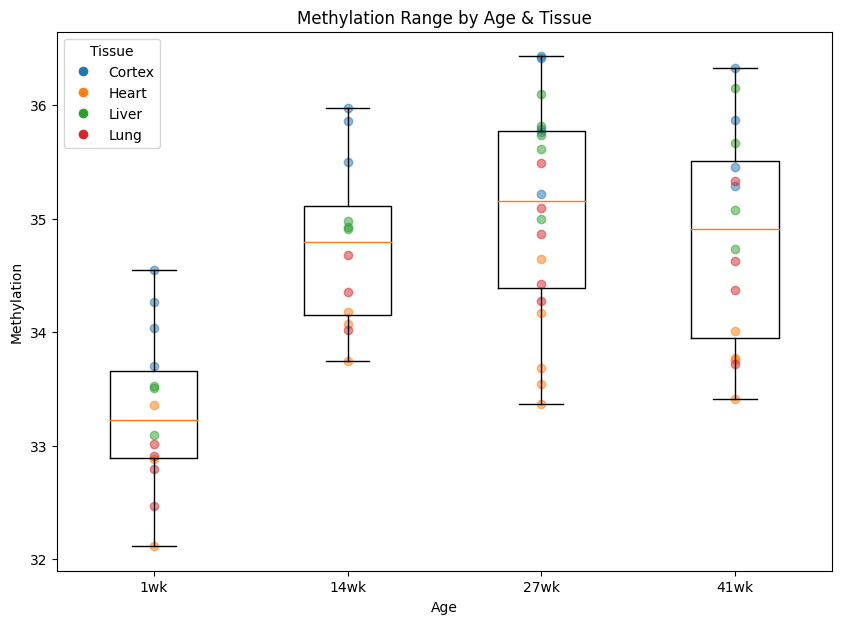

In [16]:
# Setup overall figure and add a single plot to it
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot()


# Convert the df into series and plot said series to boxplots
box_data = df.groupby('age', sort=False)['ave methylation'].apply(list)
data = box_data.values
data[0],data[1] = data[1],data[0]
bp = ax.boxplot(data)

# Add scatter plots for each tissue
for i, age in enumerate(age_list):
    age_data = df[df['age'] == age]
    for tissue in unique_tissues:
        scatter_y = age_data[age_data['tissue'] == tissue]['ave methylation']
        scatter_x = [i+1] * len(scatter_y) # Each y-value from above must have a x-value
        ax.scatter(scatter_x, scatter_y, color=color_map[tissue], alpha=0.5)

# Set x-axis labels
ax.set_xticks(range(1, len(age_list)+1))
ax.set_xticklabels(age_list)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Methylation')
ax.set_title('Methylation by Age')

# Create custom legend for tissues
scatter_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[tissue], markersize=8) for tissue in unique_tissues]
plt.legend(scatter_labels, unique_tissues, title='Tissue')

# Label Overall Figure and Display
plt.title('Methylation Range by Age & Tissue')
plt.show();



##### **Linear Regression Plot**:

In [17]:
def plot_scatter(ax: plt.Axes):
    # Get the methylation rate for per every Age and Tissue 
    for i, age in enumerate(age_list):
        for tissue in unique_tissues:
            ave_methyl = grouped_df[(grouped_df['tissue'] == tissue) & (grouped_df['age'] == age)]['ave methylation'].values[0]
            ax.scatter(i+1, ave_methyl, color=color_map[tissue], alpha=0.5)

In [18]:
def plot_regression(ax: plt.Axes, plot_tissue: bool = False):
    age_numeric = {age: i for i, age in enumerate(age_list, 1)}
    model = LinearRegression()
    X = np.array([[age_numeric[age]] for age in age_list])

    if plot_tissue:
        for tissue in unique_tissues:
            tissue_df = grouped_df[grouped_df['tissue'] == tissue] 
            y = tissue_df['ave methylation'].values  
            model.fit(X, y)
            y_pred = model.predict(X)
            r2 = model.score(X, y)  # Calculate R-squared value
            ax.plot([age_numeric[age] for age in age_list], y_pred, color=color_map[tissue], alpha=0.5)
            # Display R-squared on the graph
            ax.text(x=X[-1, 0], y=y_pred[-1], s=f'R²: {r2:.2f}', color=color_map[tissue])
            
    else:
        y = grouped_df['ave methylation'].values.reshape(4, 4).mean(axis=1)
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = model.score(X, y)
        ax.plot([age_numeric[age] for age in age_list], y_pred, alpha=0.5)
        ax.text(x=X[-1, 0], y=y_pred[-1], s=f'R²: {r2:.2f}') 
    


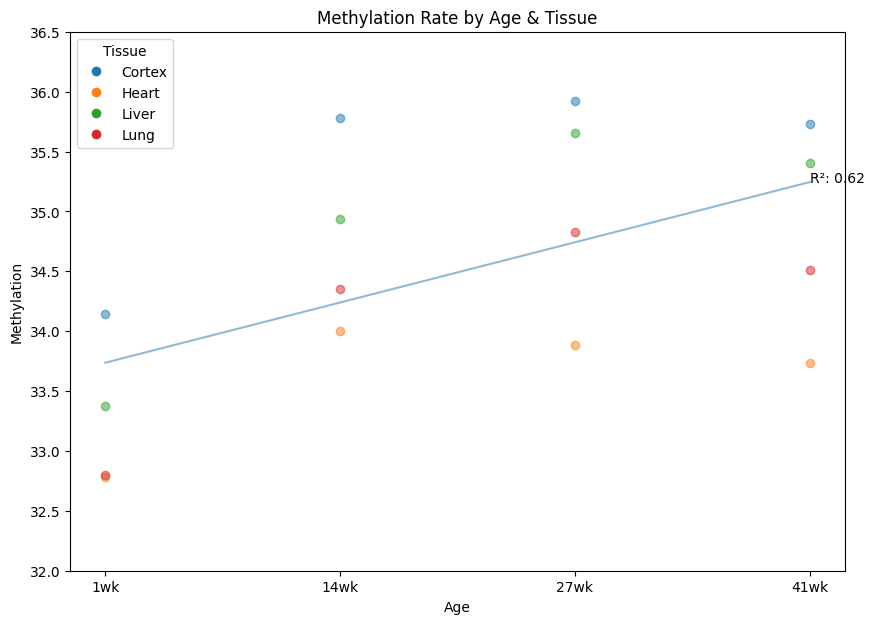

In [19]:
from sklearn.linear_model import LinearRegression

# Setup overall figure and add a single plot to it
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot()
# ax2 = fig.add_subplot()

# plot methylation points
plot_scatter(ax)
plot_regression(ax)

# Set y-axis range
ax.set_ylim(32, 36.5)

# Set x-axis labels
ax.set_xticks(range(1, len(age_list)+1))
ax.set_xticklabels(age_list)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Methylation')
ax.set_title('Methylation by Age')

# Create custom legend for tissues
ax.legend(handles=[plt.Line2D([0], [0], marker='o', color=color_map[tissue], linestyle='') for tissue in unique_tissues], 
          labels=list(unique_tissues))

plt.legend(scatter_labels, unique_tissues, title='Tissue')
# Label Overall Figure and Display
plt.title('Methylation Rate by Age & Tissue')
plt.show()


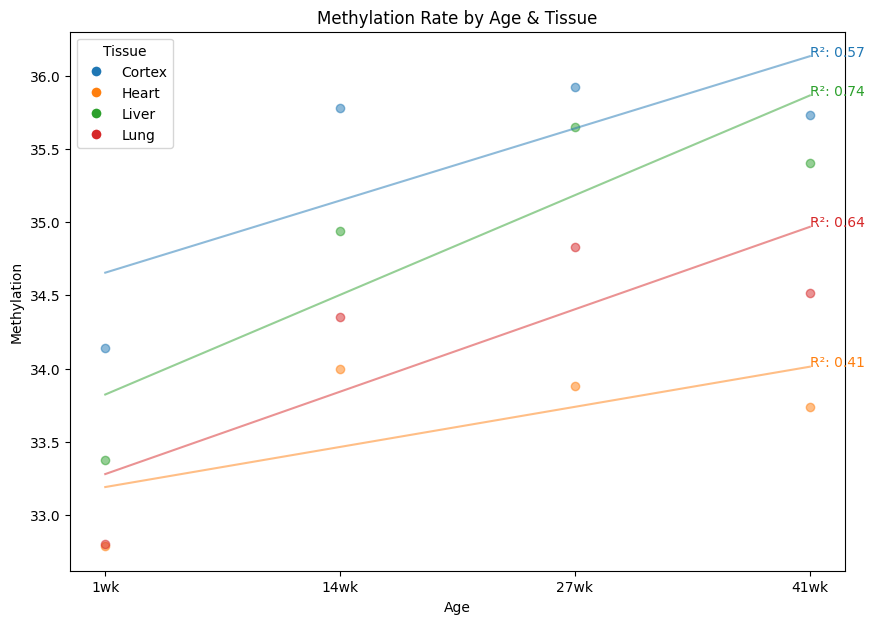

In [20]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot()

plot_scatter(ax)
plot_regression(ax, True)

# Set x-axis labels
ax.set_xticks(range(1, len(age_list)+1))
ax.set_xticklabels(age_list)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Methylation')
ax.set_title('Methylation by Age')

# Create custom legend for tissues
ax.legend(handles=[plt.Line2D([0], [0], marker='o', color=color_map[tissue], linestyle='') for tissue in unique_tissues], 
        labels=list(unique_tissues))

plt.legend(scatter_labels, unique_tissues, title='Tissue')
# Label Overall Figure and Display
plt.title('Methylation Rate by Age & Tissue')
plt.show()

In [23]:
age_numeric = {age: i for i, age in enumerate(sorted(age_list), 1)}

# Fit and plot linear regression for each tissue type
for tissue in unique_tissues:
    # Get the subset of the dataframe for the current tissue type
    tissue_df = grouped_df[grouped_df['tissue'] == tissue]
    
    # Prepare the data for fitting
    X = np.array([age_numeric[age] for age in tissue_df['age']]).reshape(-1, 1)
    y = tissue_df['ave methylation'].values
    
    # Fit the linear regression model
    model = LinearRegression().fit(X, y)
    
    # Predict y values for the fitted model
    y_pred = model.predict(X)
    
    # Plot the regression line
    ax.plot([age_numeric[age] for age in age_list], y_pred, color=color_map[tissue], alpha=0.5)


plt.show();

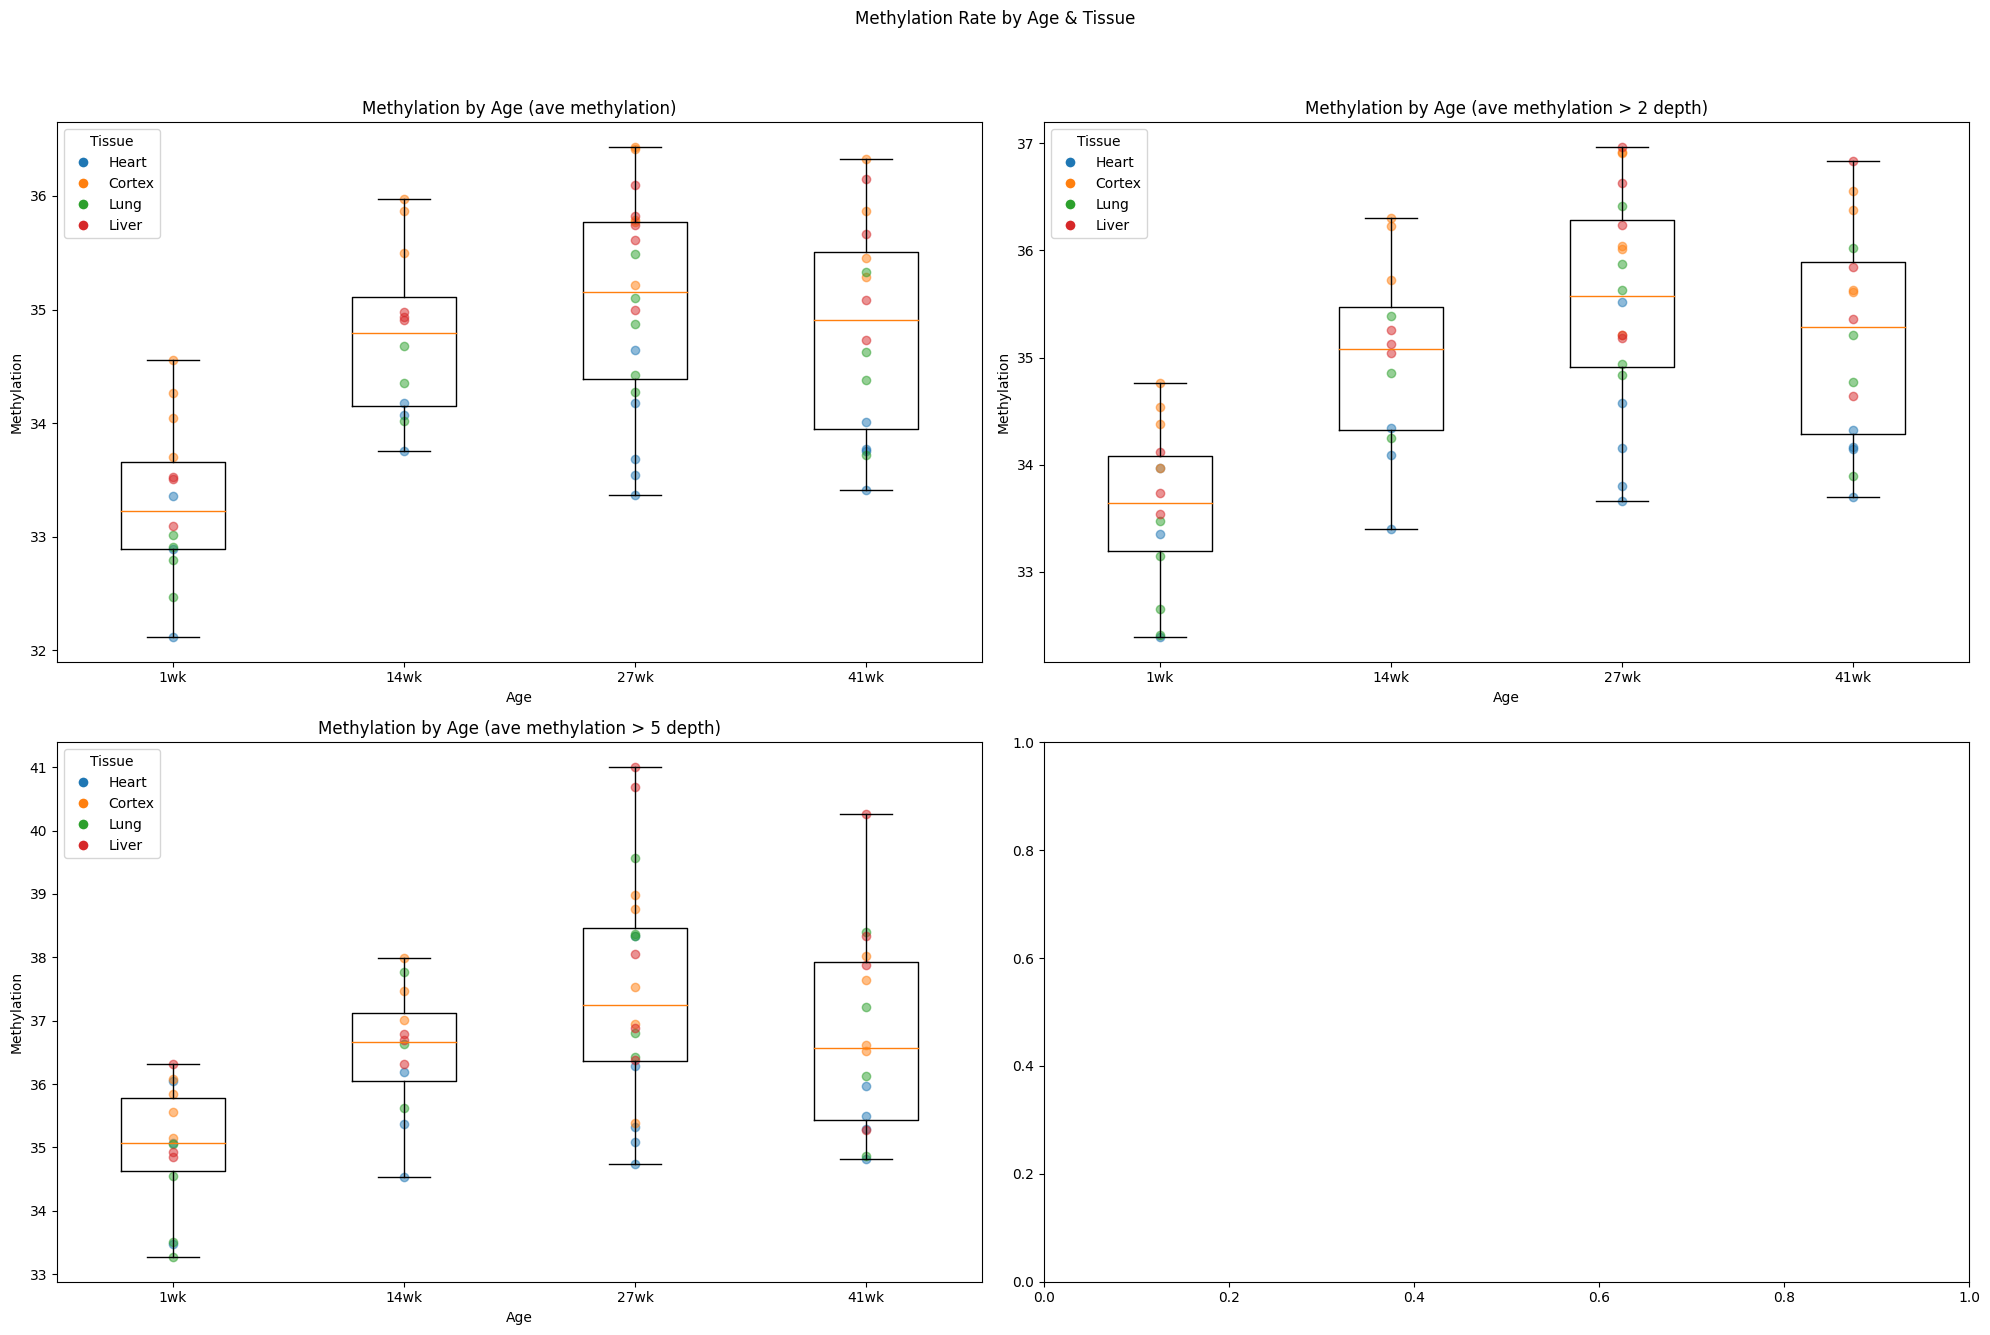

In [ ]:
# Define a function to generate a plot
def generate_plot(ax, df, column_name):
    age_groups = ['1wk', '14wk', '27wk', '41wk']
    box_data = df.groupby('age', sort=False)[column_name].apply(list)
    data = box_data.values
    data[0], data[1] = data[1], data[0]
    bp = ax.boxplot(data)
    unique_tissues = df['tissue'].unique()
    color_map = {tissue: f'C{i}' for i, tissue in enumerate(unique_tissues)}

    for i, age in enumerate(age_groups):
        age_data = df[df['age'] == age]
        for tissue in unique_tissues:
            scatter_data = age_data[age_data['tissue'] == tissue][column_name]
            scatter_x = [i+1] * len(scatter_data)
            ax.scatter(scatter_x, scatter_data, color=color_map[tissue], alpha=0.5)

    ax.set_xticks(range(1, len(age_groups)+1))
    ax.set_xticklabels(age_groups)
    ax.set_xlabel('Age')
    ax.set_ylabel('Methylation')
    ax.set_title(f'Methylation by Age ({column_name})')
    scatter_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[tissue], markersize=8) for tissue in unique_tissues]
    ax.legend(scatter_labels, unique_tissues, title='Tissue')

# Setup overall figure and add subplots to it
fig, axs = plt.subplots(2, 2, figsize =(20, 14))

generate_plot(axs[0, 0], df, 'ave methylation')
generate_plot(axs[0, 1], df, 'ave methylation > 2 depth')
generate_plot(axs[1, 0], df, 'ave methylation > 5 depth')

plt.suptitle('Methylation Rate by Age & Tissue')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
